In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

***Step 2 - Read Dataset***

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/churn project/Customer+Churn+Data.xlsx', sheet_name='Data for DSBA')

In [ ]:
df.head()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Churn,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,4,3.0,6.0,Debit Card,Female,1,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,0,1.0,8.0,UPI,Male,1,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,0,1.0,30.0,Debit Card,Male,1,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,0,3.0,15.0,Debit Card,Male,1,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,0,1.0,12.0,Credit Card,Male,1,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [ ]:
df.tail()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Churn,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,10,1.0,34.0,Credit Card,Male,0,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,13,1.0,19.0,Credit Card,Male,0,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,1,1.0,14.0,Debit Card,Male,0,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,23,3.0,11.0,Credit Card,Male,0,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,8,1.0,22.0,Credit Card,Male,0,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


***Step 3 - Sanity Check of data***

In [ ]:
df.shape

(11260, 19)

In [ ]:
df.columns

Index(['AccountID', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment',
       'Gender', 'Churn', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Churn                    11260 non-null  int64  
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
# # data type conversions

# columns_to_convert_int = ['Account_user_count', 'Day_Since_CC_connect']
# df[columns_to_convert_int] = df[columns_to_convert_int].astype(int)

In [ ]:
df.drop('AccountID', axis=1, inplace=True)

In [ ]:
# data type of few columns has to be changed

datatypes_dict = {
    'Tenure': float,
    'CC_Contacted_LY': int,
    'Account_user_count': int,
    'rev_per_month': float,
    'rev_growth_yoy': float,
    'coupon_used_for_payment': int,
    'Day_Since_CC_connect': int,
    'cashback': float
}

In [ ]:
# finding missing value
df.isnull().sum()

Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Churn                        0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [ ]:
# finding missing value percentage
round(df.isnull().sum()/df.shape[0]*100, 2)

Tenure                     0.91
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Churn                      0.00
Service_Score              0.87
Account_user_count         0.99
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              0.91
Complain_ly                3.17
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
Day_Since_CC_connect       3.17
cashback                   4.18
Login_device               1.96
dtype: float64

<Axes: >

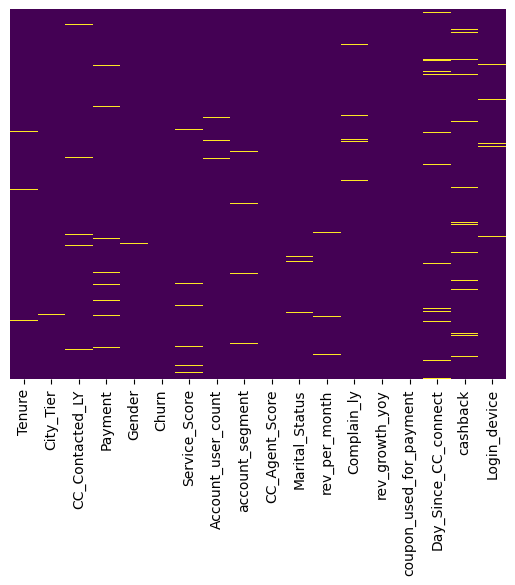

In [ ]:
# missing value in graph

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

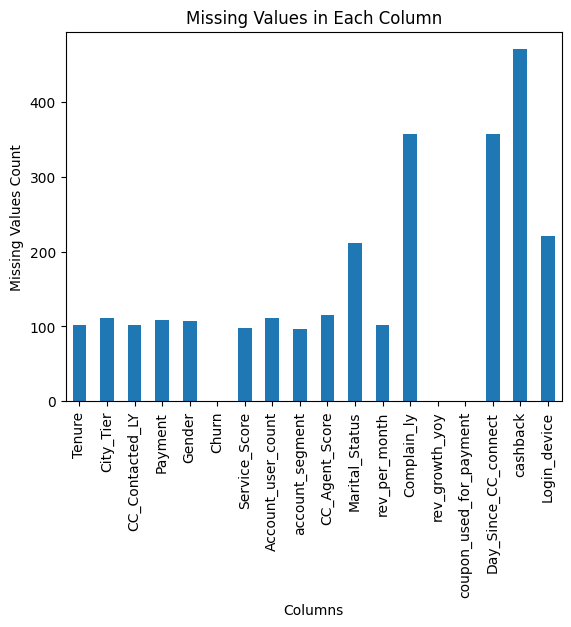

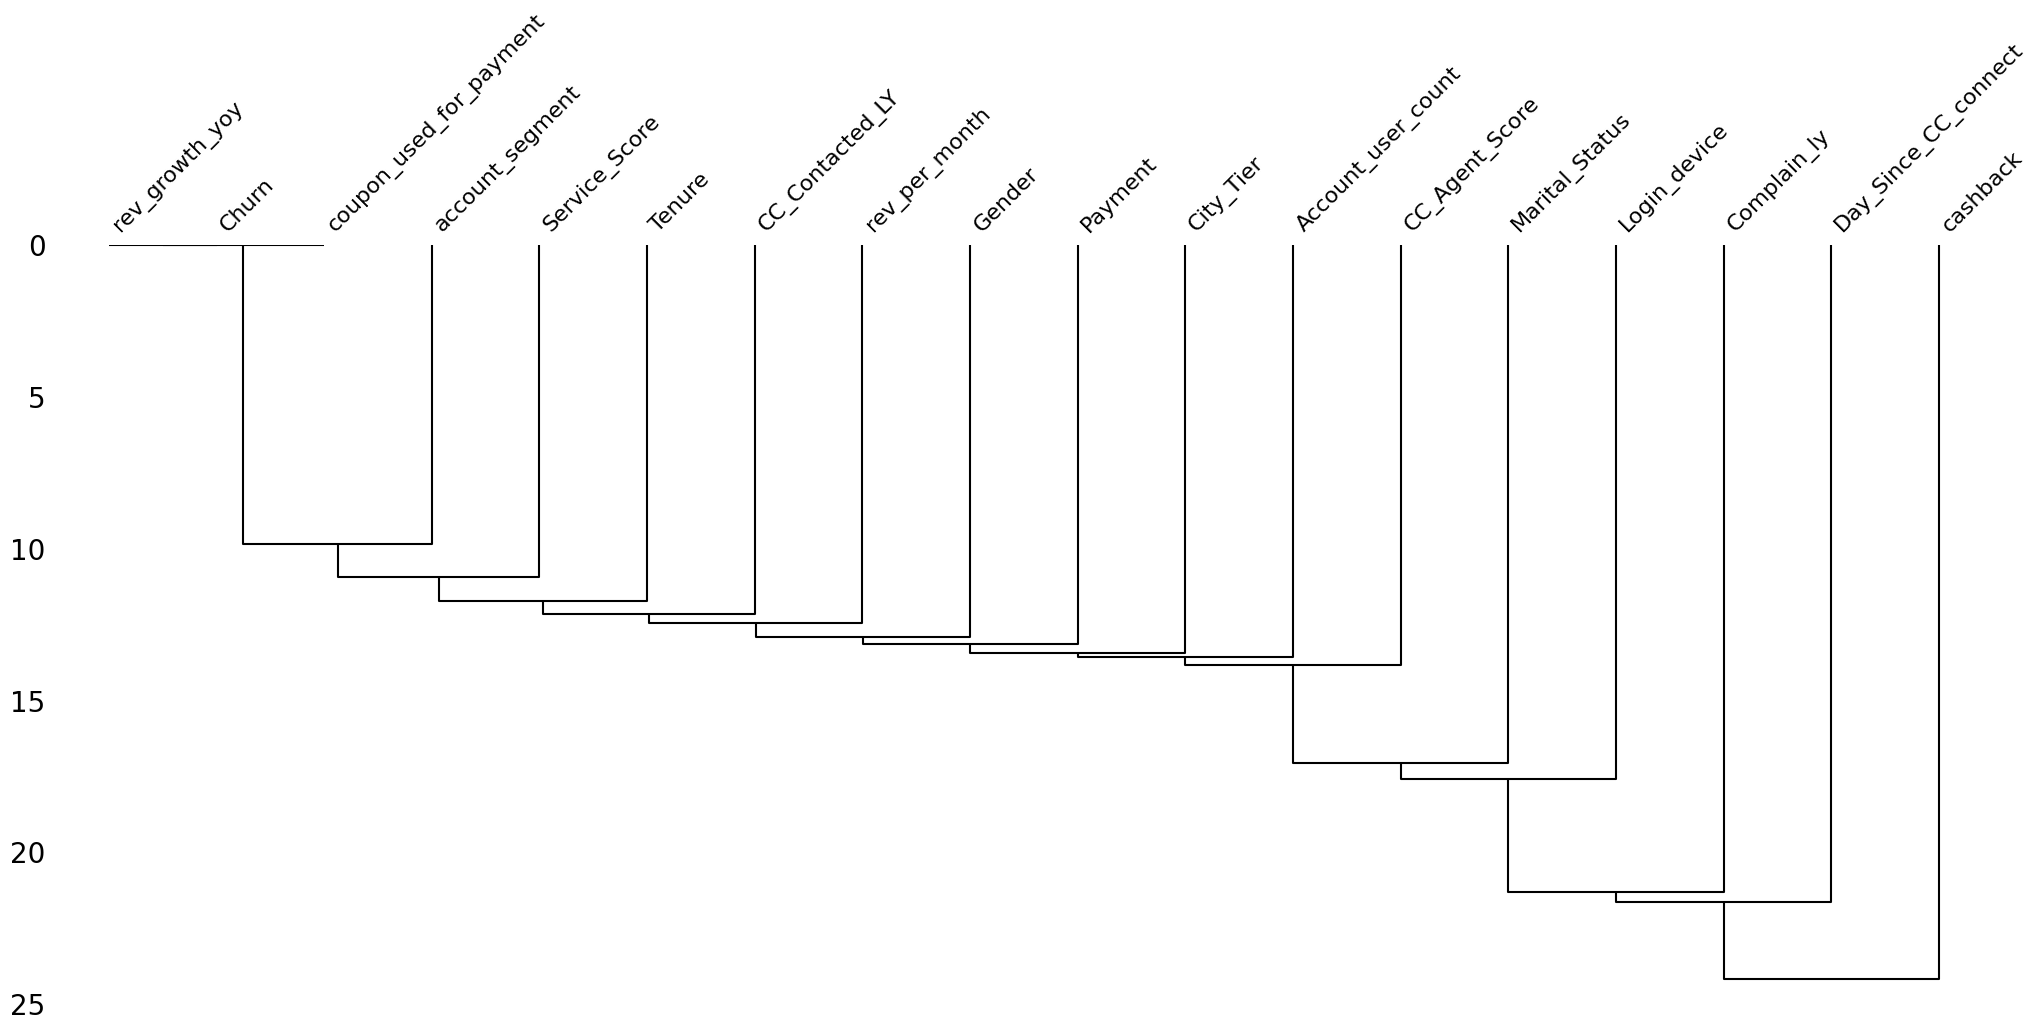

In [ ]:
# missing value graph 2


# Count missing values in each column
missing_counts = df.isnull().sum()

# Plot the counts
missing_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in Each Column')
plt.show()


msno.dendrogram(df)
plt.show()

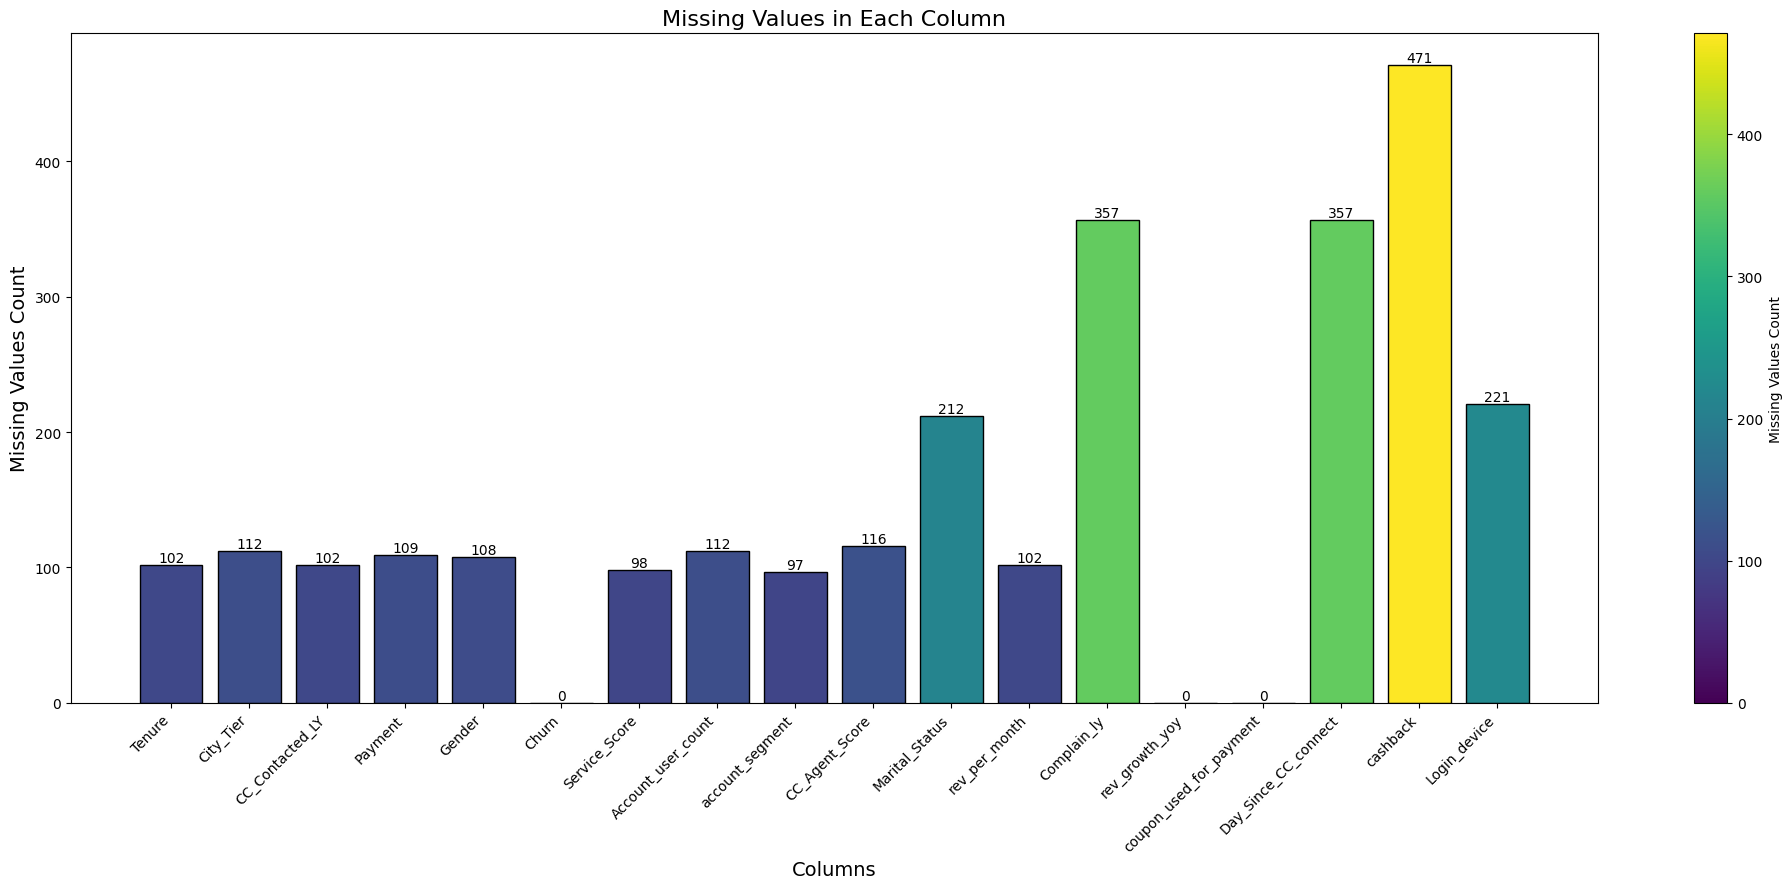

In [ ]:
# Plot the counts with customizations
plt.figure(figsize=(20, 9))  # Adjust the figure size


# Plot bars with a color gradient
bars = plt.bar(
    missing_counts.index, missing_counts,
    color=plt.cm.viridis(missing_counts / float(max(missing_counts))),
    edgecolor='black')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval, int(yval), va='bottom', ha='center')

# Customize labels and title with increased font size
plt.xlabel('Columns', fontsize=14)  # Increase font size
plt.ylabel('Missing Values Count', fontsize=14)  # Increase font size
plt.title('Missing Values in Each Column', fontsize=16)  # Increase font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a color bar to indicate the magnitude of missing values
sm = plt.cm.ScalarMappable(
    cmap='viridis',
    norm=plt.Normalize(vmin=0, vmax=max(missing_counts)))
sm._A = []
plt.colorbar(sm, label='Missing Values Count')

# Show plot
plt.tight_layout()

<Figure size 800x600 with 0 Axes>

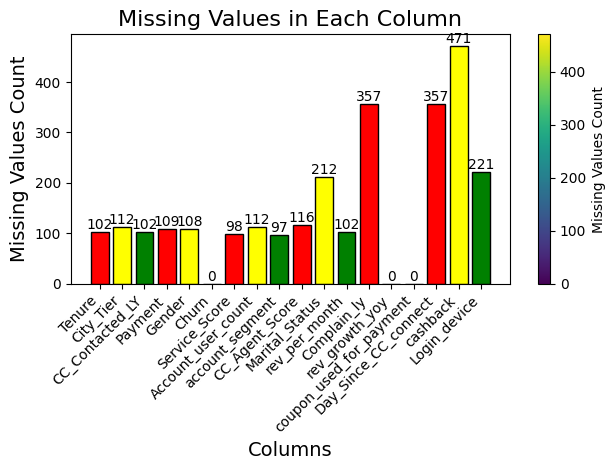

<Figure size 800x600 with 0 Axes>

In [ ]:


# Define colors for bars
colors = ['red', 'yellow', 'green']

# Plot bars with specified colors
bars = plt.bar(missing_counts.index, missing_counts, color=colors, edgecolor='black')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

# Customize labels and title with increased font size
plt.xlabel('Columns', fontsize=14)  # Increase font size
plt.ylabel('Missing Values Count', fontsize=14)  # Increase font size
plt.title('Missing Values in Each Column', fontsize=16)  # Increase font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a color bar to indicate the magnitude of missing values
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=max(missing_counts)))
sm._A = []
plt.colorbar(sm, label='Missing Values Count')

# Show plot
plt.tight_layout()

# Count missing values in each column
missing_counts = df.isnull().sum()

# Plot the counts with customizations
plt.figure(figsize=(8, 6))  # Adjust the figure size

In [ ]:
# finding duplicates

df.duplicated().sum()

259

In [ ]:
df.isnull().sum()

Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Churn                        0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

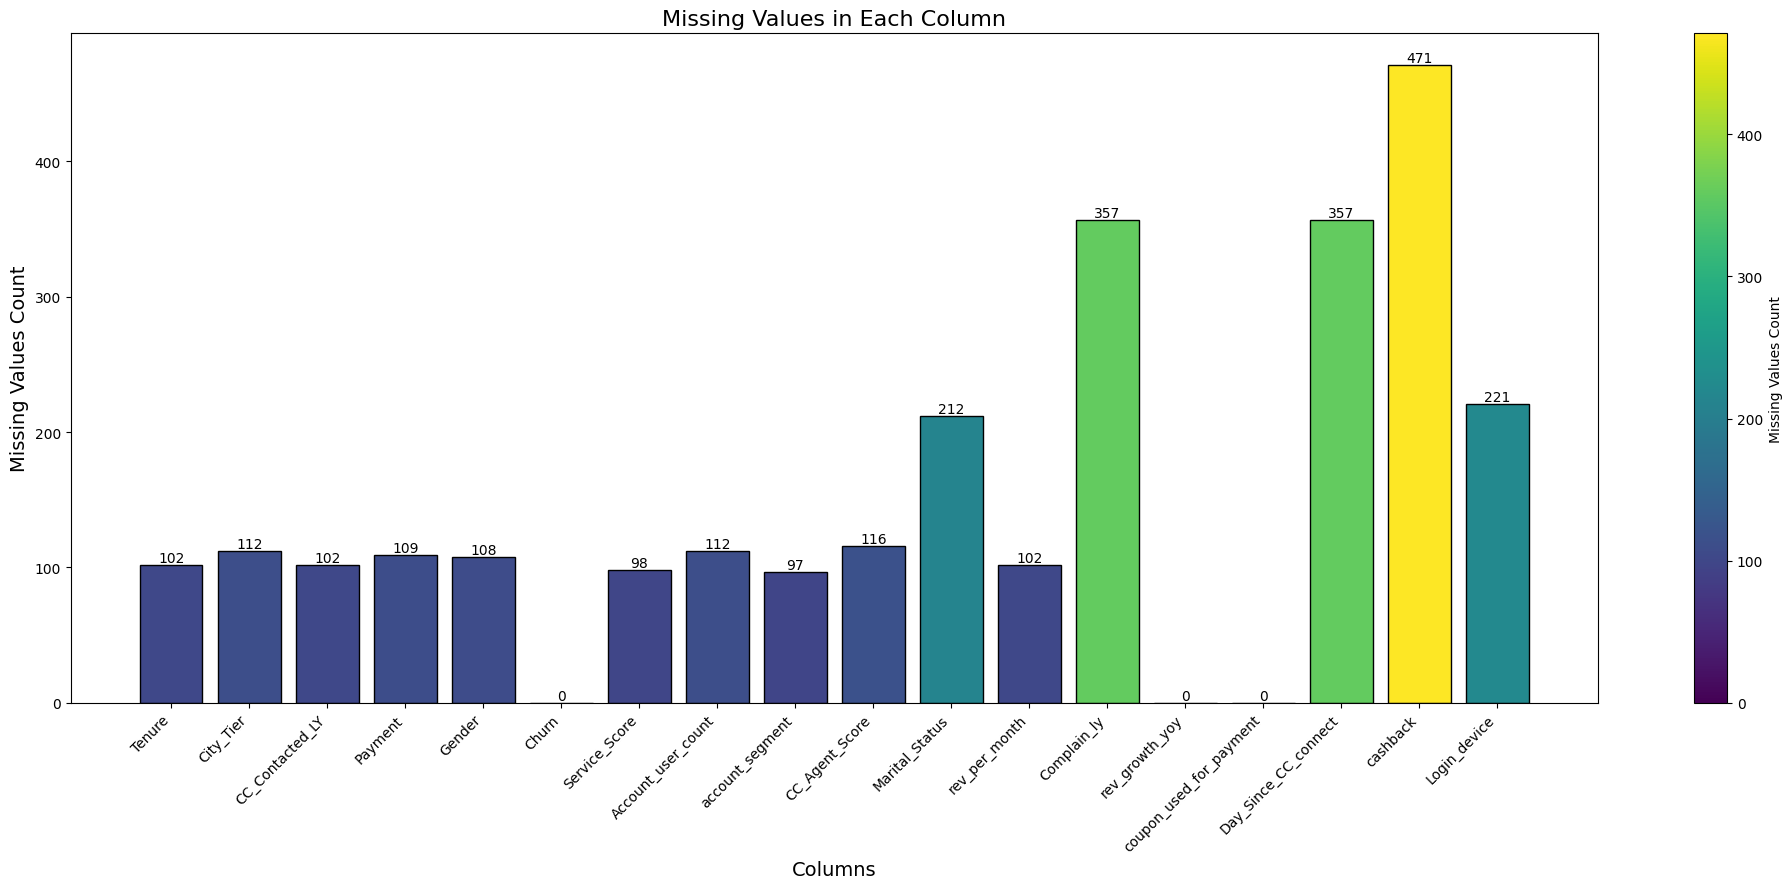

In [ ]:
# Plot the counts with customizations
plt.figure(figsize=(20, 9))  # Adjust the figure size

# Calculate missing values counts
missing_counts = df.isnull().sum()

missing_counts = df.isnull().sum()

# Plot bars with a color gradient
bars = plt.bar(missing_counts.index, missing_counts, color=plt.cm.viridis(missing_counts / float(max(missing_counts))), edgecolor='black')


# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

# Customize labels and title with increased font size
plt.xlabel('Columns', fontsize=14)  # Increase font size
plt.ylabel('Missing Values Count', fontsize=14)  # Increase font size
plt.title('Missing Values in Each Column', fontsize=16)  # Increase font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a color bar to indicate the magnitude of missing values
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=max(missing_counts)))
sm._A = []
plt.colorbar(sm, label='Missing Values Count')

# Show plot
plt.tight_layout()

In [ ]:
# tenure
df['Tenure'].fillna('0', inplace=True)

# city tier
from sklearn.impute import KNNImputer
impute = KNNImputer()

X = df['City_Tier'].values.reshape(-1, 1)
df['City_Tier'] = impute.fit_transform(X)


# because cc_score is present
df['CC_Contacted_LY'] = impute.fit_transform(df['CC_Contacted_LY'].values.reshape(-1, 1))

# Payment
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

# Gender
df['Gender'].fillna('Unknown', inplace=True)

# Service_Score
df['Service_Score'].fillna(0, inplace=True)

# Account_user_count
df['Account_user_count'].fillna(0, inplace=True)


# account_segment
df['account_segment'].replace('Regular Plus', 'Regular +', inplace=True)
df['account_segment'].replace('Super Plus', 'Super +', inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)

# CC_Agent_Score
df['CC_Agent_Score'].fillna(0, inplace=True)

# Marital_Status
df['Marital_Status'].fillna('Unknown', inplace=True)


# rev_per_month
df['rev_per_month'].replace('+', np.nan, inplace=True)
df['rev_per_month'] = impute.fit_transform(df['rev_per_month'].values.reshape(-1, 1))


# Complain_ly
df['Complain_ly'].fillna(0, inplace=True)

# rev_growth_yoy
df['rev_growth_yoy'].replace(['$', '*', '#'], np.nan, inplace=True)
df['rev_growth_yoy'] = impute.fit_transform(df['rev_growth_yoy'].values.reshape(-1, 1))


# coupon_used_for_payment
df['coupon_used_for_payment'].fillna(0, inplace=True)

# Day_Since_CC_connect
df['Day_Since_CC_connect'].fillna(-1, inplace=True)

# cashback
df['cashback'].fillna(0, inplace=True)

# Login_device
df['Login_device'].fillna(df['Login_device'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Churn                      0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [ ]:
# identifying garbase value
# garbage values are present only in object type data

for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
99     131
27     131
26     122
#      116
25     114
29     114
0      102
31      96
50       2
60       2
51       2
61       2
Name: count, dtype: int64
******************************
Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64
******************************
Gender
Male       6328
Female     4178
M           376
F           270
Unknown     108
Name: count, dtype: int64
******************************
Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
0     112
Name: count, dtype: int64
******************************
account_segment
R

***Missing and Garbage value Treatment***

In [ ]:
# # data cleaning for garbage and missing values

# # Tenure
df['Tenure'].replace('#', 0, inplace=True)

In [ ]:
# Gender
df['Gender'] = df['Gender'].apply(lambda x: "Male" if x in ['Male', 'M'] else "Female")
df['Gender'].fillna('Unknown', inplace=True)

In [ ]:
# # Tenure
df['Account_user_count'].replace('@', 0, inplace=True)
df['account_segment'].replace('Regular +', 'Regular Plus', inplace=True)
df['account_segment'].replace('Super +', 'Super Plus', inplace=True)
df['coupon_used_for_payment'].replace(['#', '$', '*'], 0, inplace=True)
df['Day_Since_CC_connect'].replace('$', 0, inplace=True)
df['Login_device'].replace('&&&&', 'Mobile', inplace=True)
df['cashback'].replace('$', 0, inplace=True)

In [ ]:
# identifying garbase value
# garbage values are present only in object type data

for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Tenure
1     1351
0     1347
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
29     114
25     114
0      102
31      96
50       2
60       2
51       2
61       2
Name: count, dtype: int64
******************************
Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64
******************************
Gender
Male      6704
Female    4556
Name: count, dtype: int64
******************************
account_segment
Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64
******************************
Marital_Status
Married     5860
Single      3520
Divorce

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  object 
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Churn                    11260 non-null  int64  
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
def whiskers(col):
  q1, q3 = np.percentile(col, [25, 75])
  iqr = q3-q1
  lw = q1 - 1.5 * iqr
  uw = q3 + 1.5 * iqr

  return lw, uw

In [ ]:
# # data type conversions

# columns_to_convert_int = ['Account_user_count', 'Day_Since_CC_connect', 'City_Tier']
columns_to_convert_int = ['Account_user_count', 'Day_Since_CC_connect', 'City_Tier', 'CC_Contacted_LY', 'Complain_ly']

df[columns_to_convert_int] = df[columns_to_convert_int].astype(int)

In [ ]:
columns_to_convert_int = ['Tenure']
df[columns_to_convert_int] = df[columns_to_convert_int].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  int64  
 2   CC_Contacted_LY          11260 non-null  int64  
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Churn                    11260 non-null  int64  
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
lw, uw = whiskers(df['Tenure'])

df['Tenure'] = np.where(df['Tenure']<lw, lw, df['Tenure'])
df['Tenure'] = np.where(df['Tenure']>uw, uw, df['Tenure'])


In [ ]:
# !pip install dataprep

In [ ]:
# from dataprep.eda import create_report

# create_report(df)

In [ ]:
# # Select only numeric columns (assuming you want to exclude non-numeric ones)
# numeric_columns = df.select_dtypes(include=[np.number])
# num_columns = len(numeric_columns)

# # Create a figure with subplots (adjust rows and cols as needed)
# fig, axes = plt.subplots(nrows=2, ncols=num_columns // 2, figsize=(12, 6))  # Adjust figsize for layout

# # Iterate through columns and create boxplots on subplots
# for i, col in enumerate(numeric_columns):
#     row = i // num_columns
#     # col = i % num_columns
#     axes[row, col].boxplot(df[col])
#     axes[row, col].set_title(col)
#     axes[row, col].grid(True)

# # Adjust layout (optional)
# plt.tight_layout()

# plt.xlabel("Data")
# plt.ylabel("Value")
# plt.suptitle("Box Plots of Numeric Columns", y=1.02)  # Set main title above subplots

# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame

# # Select numeric columns
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows and columns for subplots
# num_rows = len(numeric_cols) // 2
# num_cols = 2 if len(numeric_cols) % 2 == 0 else 1

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# # Flatten axes if there is only one row or one column
# if num_rows == 1 or num_cols == 1:
#     axes = axes.flatten()

# # Plot boxplots
# # for i, col in enumerate(numeric_cols):
#     if num_rows == 1 or num_cols == 1:
#         ax = axes[i]
#     else:
#         ax = axes[i // num_cols][i % num_cols]
#     df.boxplot(column=col, ax=ax)
#     ax.set_title(col)

# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# sns.set(style="whitegrid")

# # Assuming df is your DataFrame

# # Select numeric columns
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows and columns for subplots
# num_rows = len(numeric_cols) // 2
# num_cols = 2 if len(numeric_cols) % 2 == 0 else 1

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# # Flatten axes if there is only one row or one column
# if num_rows == 1 or num_cols == 1:
#     axes = axes.flatten()

# # Plot boxplots
# for i, col in enumerate(numeric_cols):
#     if num_rows == 1 or num_cols == 1:
#         ax = axes[i]
#     else:
#         ax = axes[i // num_cols][i % num_cols]
#     sns.boxplot(x=df[col], ax=ax, color='skyblue', linewidth=2)
#     ax.set_title(col)
#     ax.set_xlabel('')  # Remove x-label

# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# sns.set(style="whitegrid")

# # Assuming df is your DataFrame

# # Select numeric columns
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows and columns for subplots
# num_rows = len(numeric_cols) // 2
# num_cols = 2 if len(numeric_cols) % 2 == 0 else 1

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# # Flatten axes if there is only one row or one column
# if num_rows == 1 or num_cols == 1:
#     axes = axes.flatten()

# # Plot boxplots
# for i, col in enumerate(numeric_cols):
#     if num_rows == 1 or num_cols == 1:
#         ax = axes[i]
#     else:
#         ax = axes[i // num_cols][i % num_cols]
#     sns.violinplot(x=df[col], ax=ax, color='skyblue', linewidth=2)
#     ax.set_title(col)
#     ax.set_xlabel('')  # Remove x-label

# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# sns.set(style="whitegrid")

# # Assuming df is your DataFrame

# # Select numeric columns
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows and columns for subplots
# num_rows = len(numeric_cols) // 2
# num_cols = 2 if len(numeric_cols) % 2 == 0 else 1

# # Create subplots
# fig, axes = plt.subplots(num_cols, num_rows, figsize=(5*num_rows, 15))

# # Flatten axes if there is only one row or one column
# if num_rows == 1 or num_cols == 1:
#     axes = axes.flatten()

# # Plot boxplots
# for i, col in enumerate(numeric_cols):
#     if num_rows == 1 or num_cols == 1:
#         ax = axes[i]
#     else:
#         ax = axes[i % num_cols][i // num_cols]
#     sns.boxplot(y=df[col], ax=ax, color='skyblue', linewidth=2)
#     ax.set_title(col)
#     ax.set_xlabel('')  # Remove x-label

# plt.tight_layout()
# plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  int64  
 2   CC_Contacted_LY          11260 non-null  int64  
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Churn                    11260 non-null  int64  
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
# dummies = pd.get_dummies(data=df, columns=['Payment', 'Gender', 'Marital_Status', 'Login_device'], drop_first=True)
# dummies.columns


In [ ]:
payment_df = pd.get_dummies(df['Payment'], drop_first=True)  # Set drop_first=True to drop the first category to avoid multicollinearity
Gender_df = pd.get_dummies(df['Gender'], drop_first=True)  # Set drop_first=True to drop the first category to avoid multicollinearity
Marital_Status_df = pd.get_dummies(df['Marital_Status'], drop_first=True)  # Set drop_first=True to drop the first category to avoid multicollinearity
Login_device_df = pd.get_dummies(df['Login_device'], drop_first=True)  # Set drop_first=True to drop the first category to avoid multicollinearity


In [ ]:
one_hot_encoded_df.columns

Index(['Credit Card', 'Debit Card', 'E wallet', 'UPI'], dtype='object')

In [ ]:
df = pd.concat([df, payment_df], axis='columns')
df = pd.concat([df, Gender_df], axis='columns')
df = pd.concat([df, Marital_Status_df], axis='columns')
df = pd.concat([df, Login_device_df], axis='columns')


In [ ]:
df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Churn',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Credit Card', 'Debit Card', 'E wallet',
       'UPI', 'Male', 'Married', 'Single', 'Unknown', 'Mobile'],
      dtype='object')

In [ ]:
df = df.drop(['Payment', 'Gender', 'Marital_Status', 'Login_device'], axis='columns')
df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Churn', 'Service_Score',
       'Account_user_count', 'account_segment', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Credit Card', 'Debit Card', 'E wallet', 'UPI', 'Male', 'Married',
       'Single', 'Unknown', 'Mobile'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  int64  
 2   CC_Contacted_LY          11260 non-null  int64  
 3   Churn                    11260 non-null  int64  
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  int64  
 6   account_segment          11260 non-null  object 
 7   CC_Agent_Score           11260 non-null  float64
 8   rev_per_month            11260 non-null  float64
 9   Complain_ly              11260 non-null  int64  
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  int64  
 12  Day_Since_CC_connect     11260 non-null  int64  
 13  cashback                 11260 non-null  float64
 14  Credit Card           

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure that 'account_segment' is a Series
account_segment_series = df['account_segment']

label_endcoder = LabelEncoder()
df['account_segment'] = label_endcoder.fit_transform(df['account_segment'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  int64  
 2   CC_Contacted_LY          11260 non-null  int64  
 3   Churn                    11260 non-null  int64  
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  int64  
 6   account_segment          11260 non-null  int64  
 7   CC_Agent_Score           11260 non-null  float64
 8   rev_per_month            11260 non-null  float64
 9   Complain_ly              11260 non-null  int64  
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  int64  
 12  Day_Since_CC_connect     11260 non-null  int64  
 13  cashback                 11260 non-null  float64
 14  Credit Card           

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
scaled_df.head()

,Tenure,City_Tier,CC_Contacted_LY,Churn,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,cashback,Credit Card,Debit Card,E wallet,UPI,Male,Married,Single,Unknown,Mobile
0,-0.675327,1.481914,-1.345642,2.222345,0.159178,-0.443634,0.743123,-0.735498,0.229675,1.618461,...,-0.156570,-0.673120,1.182280,-0.348108,-0.280626,-1.213040,-1.041722,1.482857,-0.138524,0.605123
1,-1.119827,-0.709334,-1.118707,2.222345,0.159178,0.367031,-0.150848,-0.024805,0.055508,1.618461,...,-0.374328,-0.673120,-0.845824,-0.348108,3.563467,0.824375,-1.041722,1.482857,-0.138524,0.605123
2,-1.119827,-0.709334,1.377587,2.222345,-1.137744,0.367031,-0.150848,-0.024805,-0.031576,1.618461,...,-1.048857,-0.673120,1.182280,-0.348108,-0.280626,0.824375,-1.041722,1.482857,-0.138524,0.605123
3,-1.119827,1.481914,-0.324431,2.222345,-1.137744,0.367031,0.743123,1.396582,0.142591,-0.617871,...,-0.300849,-0.673120,1.182280,-0.348108,-0.280626,0.824375,-1.041722,1.482857,-0.138524,0.605123
4,-1.119827,-0.709334,-0.664835,2.222345,-1.137744,-0.443634,-0.150848,1.396582,-0.292827,-0.617871,...,-0.325788,1.485619,-0.845824,-0.348108,-0.280626,0.824375,-1.041722,1.482857,-0.138524,0.605123


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

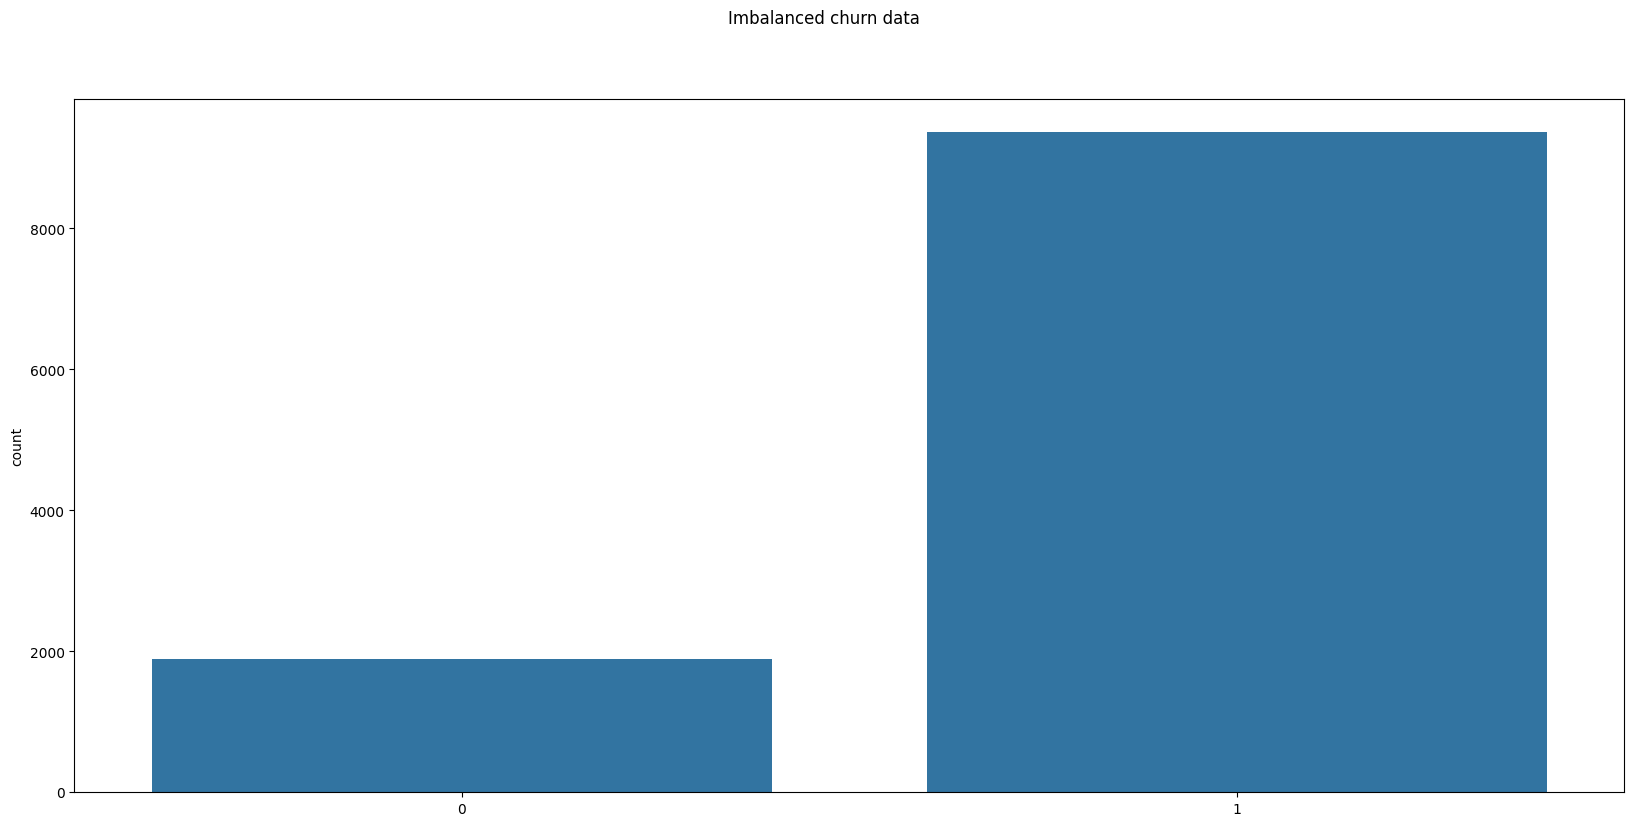

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
# sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, ax=ax[0])
sns.barplot(x=y.unique(), y=y.value_counts())
plt.suptitle("Imbalanced churn data")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

Churn
1    9364
0    9364
Name: count, dtype: int64

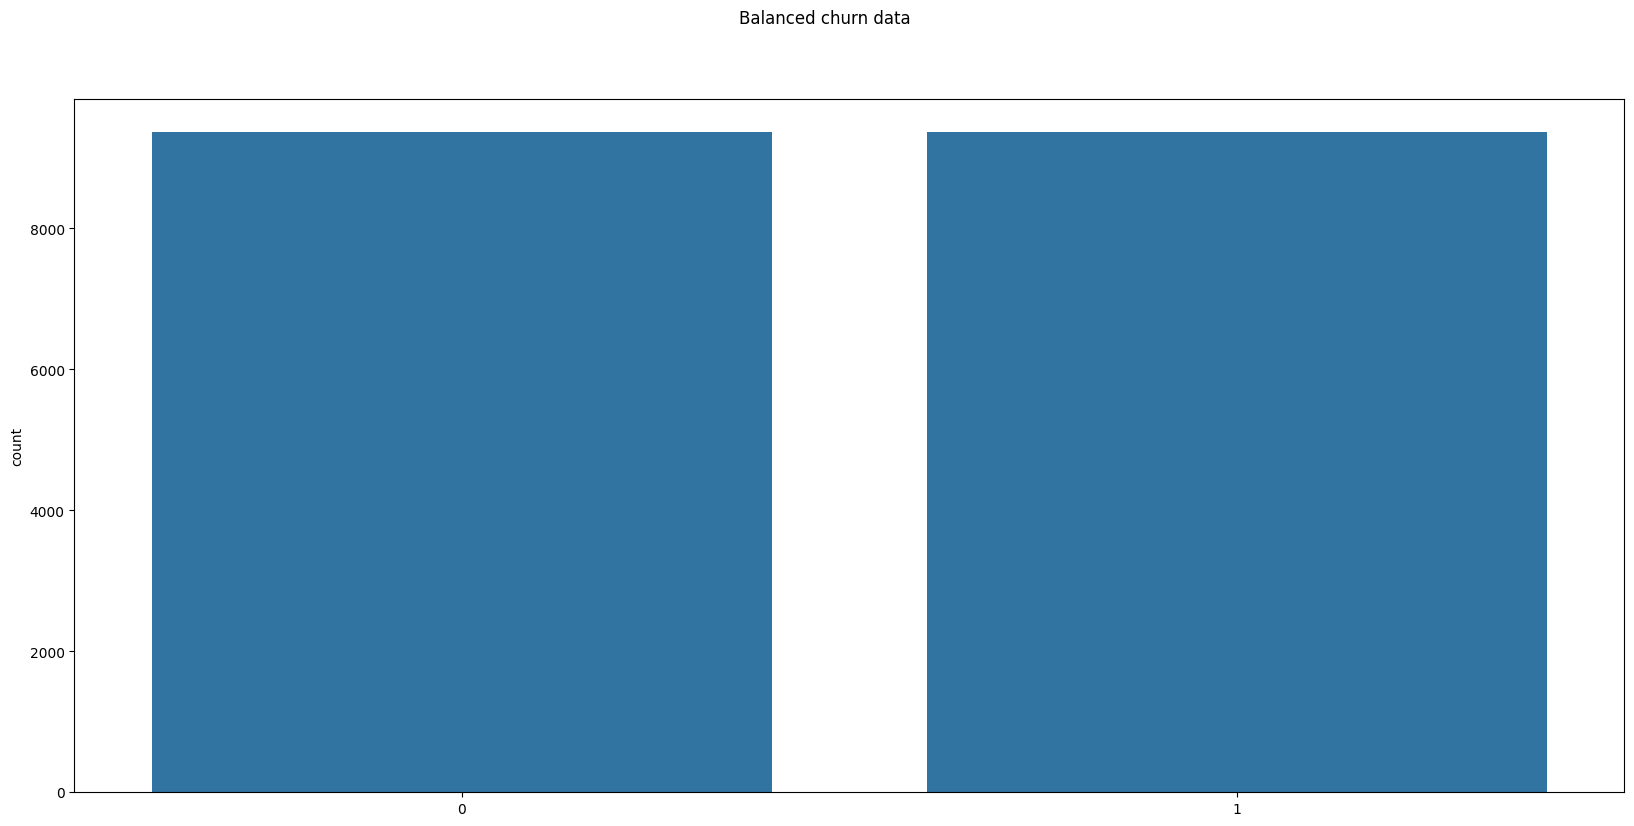

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
# sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, ax=ax[0])
sns.barplot(x=y_resampled.unique(), y=y_resampled.value_counts())
plt.suptitle("Balanced churn data")
plt.show()


Model Building

In [ ]:


# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier


# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# # Define models
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "SVM": SVC(),
#     "Random Forest": RandomForestClassifier(),
#     "Neural Networks": MLPClassifier(),
#     "KNN": KNeighborsClassifier()
# }

# # Define hyperparameters grid for each model
# param_grids = {
#     "Logistic Regression":
#      {
#          'clf__C': [0.1, 1, 10],
#          'clf__penalty': ['l1', 'l2']
#          },
#     "Decision Tree":
#      {
#          'clf__max_depth': [3, 5, 7],
#          'clf__min_samples_split': [2, 5, 10]
#          },
#     "SVM":
#      {
#          'clf__C': [0.1, 1, 10],
#          'clf__kernel': ['linear', 'rbf']
#          },
#     "Random Forest":
#      {
#          'clf__n_estimators': [50, 100, 200],
#          'clf__max_depth': [None, 10, 20]
#          },
#     "Neural Networks":
#      {
#          'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],
#          'clf__activation': ['relu', 'tanh'],
#          'clf__alpha': [0.0001, 0.001, 0.01]
#          },
#     "KNN":
#      {
#          'clf__n_neighbors': [3, 5, 7],
#          'clf__weights': ['uniform', 'distance'],
#           "algorithm": ["auto", "ball_tree"]
#          }
# }

# # Perform grid search CV for each model
# for name, model in models.items():
#     pipe = Pipeline(steps=[('clf', model)])
#     grid_search = GridSearchCV(pipe, param_grid=param_grids[name], scoring='accuracy', cv=5)
#     grid_search.fit(X_train, y_train)

#     # Predictions
#     y_pred = grid_search.predict(X_test)

#     # Evaluation
#     print(f"Model: {name}")
#     print("Best Parameters:", grid_search.best_params_)
#     print("Best Score:", grid_search.best_score_)
#     print(classification_report(y_test, y_pred))
#     print("------------------------------------------------------------------------\n\n")


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier


# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# # Define models
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "Neural Networks": MLPClassifier(),
#     "SVM": SVC()
# }

# # Define hyperparameters grid for each model
# param_grids = {
#     "Logistic Regression":
#      {
#          'clf__C': [0.1, 1, 10],
#          'clf__penalty': ['l1', 'l2']
#          },
#     "Decision Tree":
#      {
#          'clf__max_depth': [3, 5, 7],
#          'clf__min_samples_split': [2, 5, 10]
#          },
#     "SVM":
#      {
#          'clf__C': [1, 10],
#          'clf__kernel': ['linear', 'rbf']
#          },
#     "Random Forest":
#      {
#          'clf__n_estimators': [50, 100, 200],
#          'clf__max_depth': [None, 10, 20]
#          },
#     "Neural Networks":
#      {
#          'clf__hidden_layer_sizes': [(50, 50)],
#          'clf__activation': ['relu', 'tanh']
#          },
#     "KNN":
#      {
#          'clf__n_neighbors': [3, 5, 7],
#          'clf__weights': ['uniform', 'distance'],
#          'clf__algorithm': ["auto", "ball_tree"]  # Move 'algorithm' inside param_grids
#      }
# }


# # Perform grid search CV for each model
# for name, model in models.items():
#     pipe = Pipeline(steps=[('clf', model)])
#     grid_search = GridSearchCV(pipe, param_grid=param_grids[name], scoring='accuracy', cv=5)
#     grid_search.fit(X_train, y_train)

#     # Predictions
#     y_pred = grid_search.predict(X_test)

#     # Evaluation
#     print(f"Model: {name}")
#     print("Best Parameters:", grid_search.best_params_)
#     print("Best Score:", grid_search.best_score_)
#     print(classification_report(y_test, y_pred))
#     print("------------------------------------------------------------------------\n\n")


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier


# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# # Define models
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "Neural Networks": MLPClassifier(),
#     "SVM": SVC()
# }

# # Define hyperparameters grid for each model
# param_grids = {
#     "Logistic Regression":
#      {
#          'clf__C': [0.1, 1, 10],
#          'clf__penalty': ['l1', 'l2']
#          },
#     "Decision Tree":
#      {
#          'clf__max_depth': [3, 5, 7],
#          'clf__min_samples_split': [2, 5, 10]
#          },
#     "SVM":
#      {
#          'clf__C': [1, 10],
#          'clf__kernel': ['linear', 'rbf']
#          },
#     "Random Forest":
#      {
#          'clf__n_estimators': [50, 100, 200],
#          'clf__max_depth': [None, 10, 20]
#          },
#     "Neural Networks":
#      {
#          'clf__hidden_layer_sizes': [(50, 50)],
#          'clf__activation': ['relu', 'tanh']
#          },
#     "KNN":
#      {
#          'clf__n_neighbors': [3, 5, 7],
#          'clf__weights': ['uniform', 'distance'],
#          'clf__algorithm': ["auto", "ball_tree"]  # Move 'algorithm' inside param_grids
#      }
# }


# # Perform grid search CV for each model
# for name, model in models.items():
#     pipe = Pipeline(steps=[('clf', model)])
#     grid_search = GridSearchCV(pipe, param_grid=param_grids[name], scoring='accuracy', cv=5)
#     grid_search.fit(X_train, y_train)

#     # Predictions
#     y_pred = grid_search.predict(X_test)

#     # Evaluation
#     print(f"Model: {name}")
#     print("Best Parameters:", grid_search.best_params_)
#     print("Best Score:", grid_search.best_score_)

#     # Even Accuracy (assuming binary classification)
#     even_accuracy = (sum(y_pred == y_test) / len(y_test)) * 2  # Multiply by 2 for even classes
#     print(f"Even Accuracy:", even_accuracy)

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     print("Confusion Matrix:\n", cm)

#     print(classification_report(y_test, y_pred))
#     print("------------------------------------------------------------------------\n\n")


In [ ]:


# # Create a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".1f")
# plt.title('Heatmap of DataFrame')
# plt.show()

11260


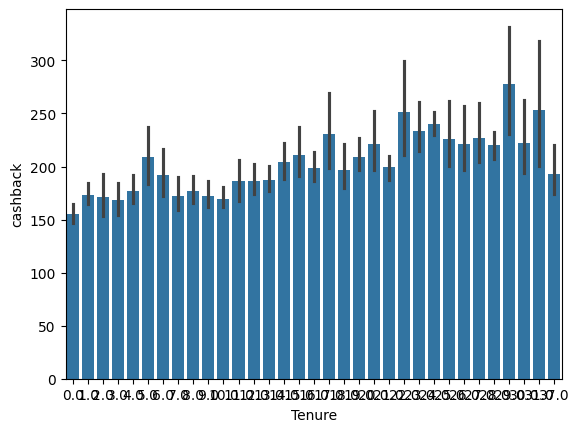

11260


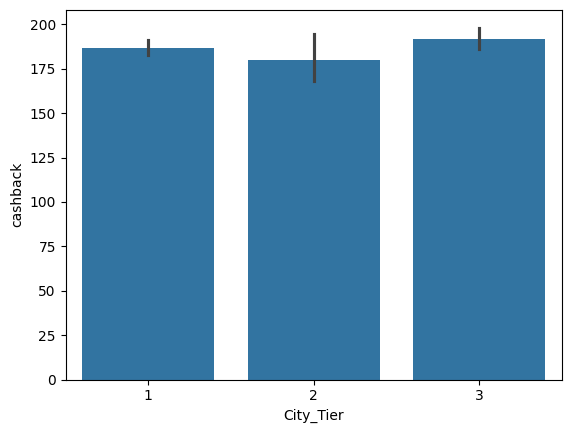

11260


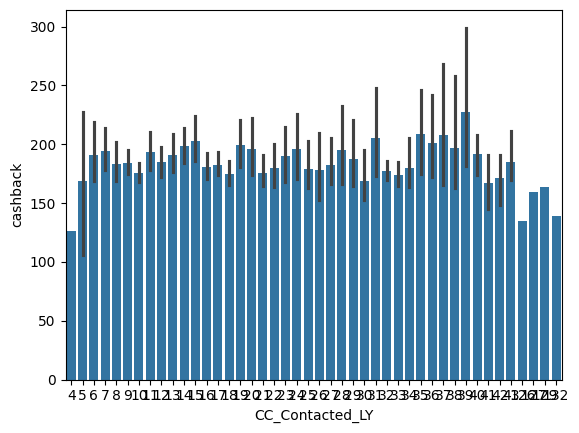

11260


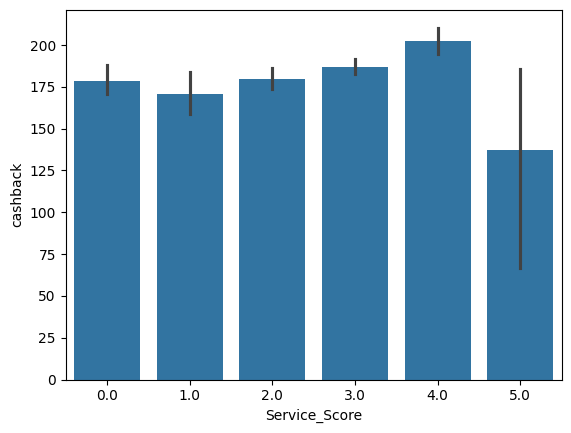

11260


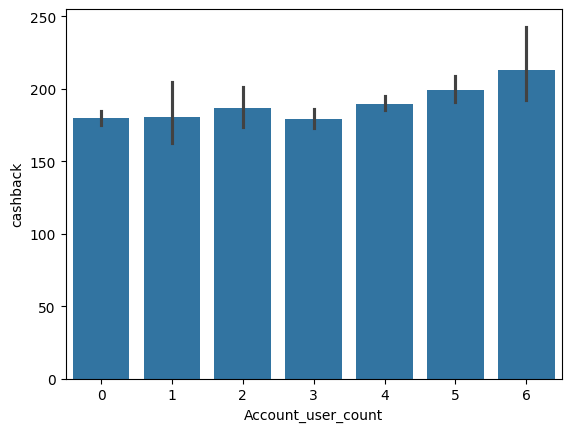

11260


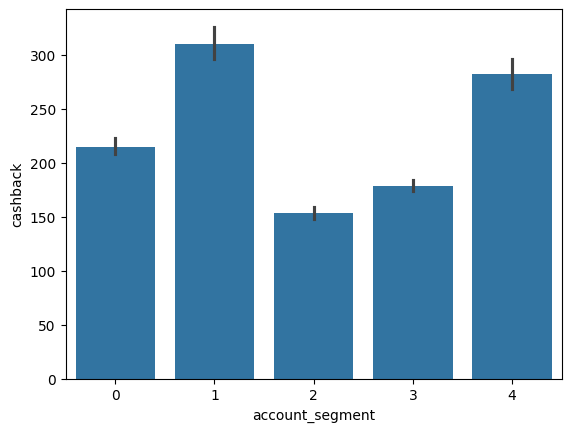

11260


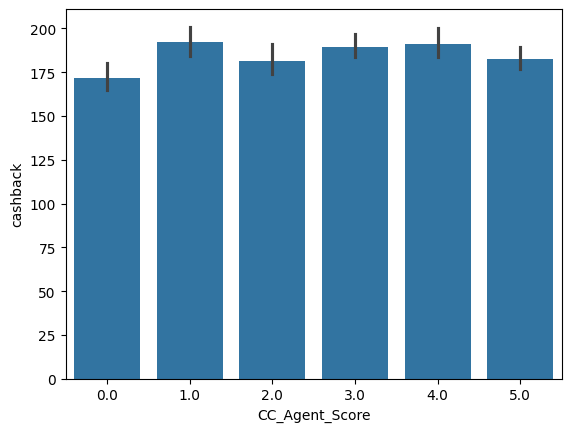

11260


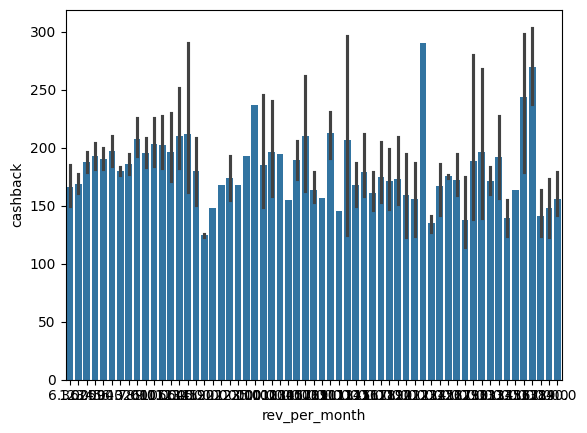

11260


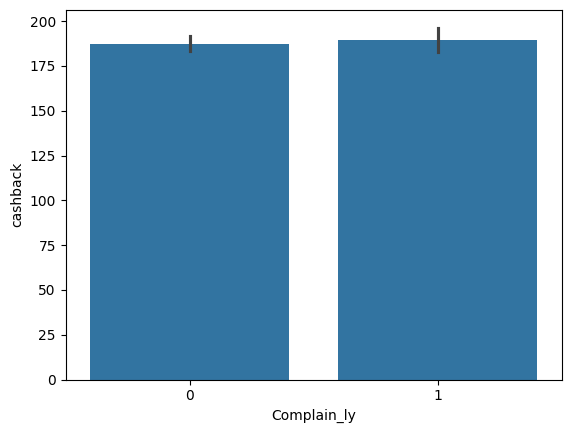

11260


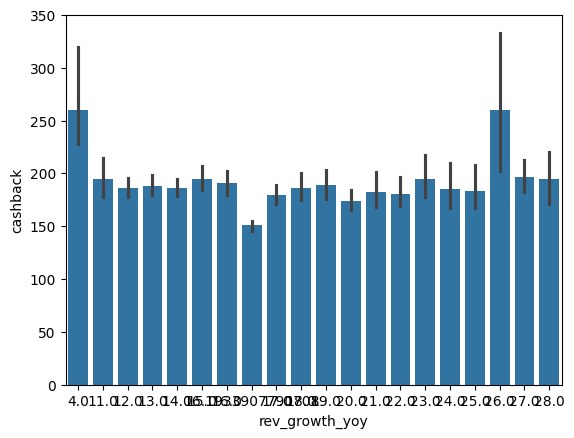

11260


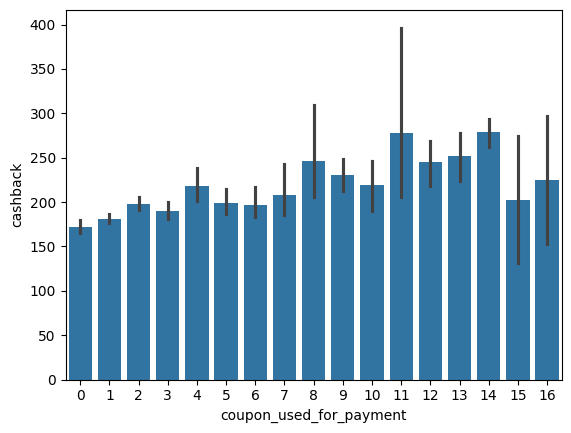

11260


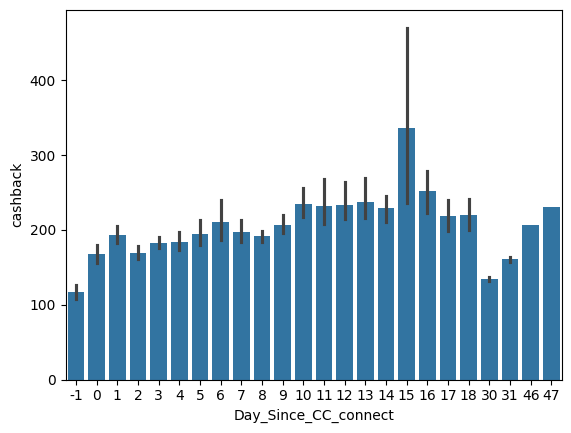

11260


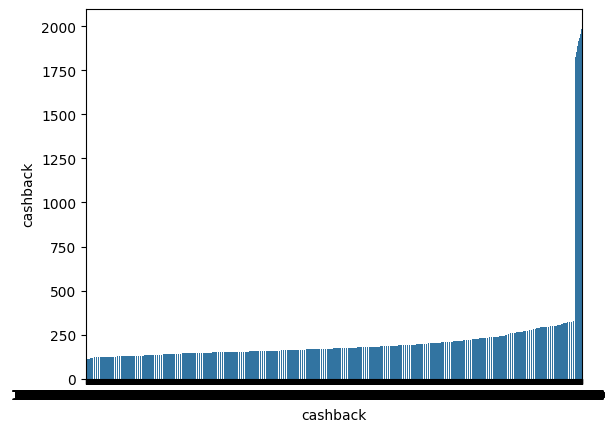

In [ ]:
for i in df.select_dtypes(include="number").columns:
  if i.lower() != "churn":
    print(len(df["Churn"]))
    sns.barplot(data=df, x=i, y="cashback")
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Neural Networks": MLPClassifier(),
    "SVM": SVC()
}

# Define hyperparameters grid for each model
param_grids = {
    "Logistic Regression":
     {
         'clf__C': [0.1, 1, 10],
         'clf__penalty': ['l1', 'l2']
         },
    "Decision Tree":
     {
         'clf__max_depth': [3, 5, 7],
         'clf__min_samples_split': [2, 5, 10]
         },
    "SVM":
     {
         'clf__C': [1, 10],
         'clf__kernel': ['linear', 'rbf']
         },
    "Random Forest":
     {
         'clf__n_estimators': [50, 100, 200],
         'clf__max_depth': [None, 10, 20]
         },
    "Neural Networks":
     {
         'clf__hidden_layer_sizes': [(50, 50)],
         'clf__activation': ['relu', 'tanh']
         },
    "KNN":
     {
         'clf__n_neighbors': [3, 5, 7],
         'clf__weights': ['uniform', 'distance'],
         'clf__algorithm': ["auto", "ball_tree"]  # Move 'algorithm' inside param_grids
     }
}

# Perform grid search CV for each model
for name, model in models.items():
    pipe = Pipeline(steps=[('clf', model)])
    grid_search = GridSearchCV(pipe, param_grid=param_grids[name], scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    # Predictions
    y_pred = grid_search.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Evaluation
    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(cm)
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------------------------\n\n")


NameError: name 'X_resampled' is not defined

In [ ]:
# # revenue_per_month

# from sklearn.impute import KNNImputer
# impute = KNNImputer()

# df['rev_per_month'].replace('+', np.nan, inplace=True)
# X = df['rev_per_month'].values.reshape(-1, 1)
# df['rev_per_month'] = impute.fit_transform(X)

In [ ]:
# '# revenue_growth_yoy

# impute = KNNImputer()

# df['rev_growth_yoy'].replace('$', np.nan, inplace=True)
# X = df['rev_growth_yoy'].values.reshape(-1, 1)
# df['rev_growth_yoy'] = impute.fit_transform(X)'

In [ ]:
# # City_Tier

# X = df['City_Tier'].values.reshape(-1, 1)
# df['City_Tier'] = impute.fit_transform(X)

In [ ]:
# # because cc_score is present

# df['CC_Contacted_LY'] = impute.fit_transform(df['CC_Contacted_LY'].values.reshape(-1, 1))

In [ ]:
# # Payment

# df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

In [ ]:
df.info()

In [ ]:
# finding missing value
df.isnull().sum()

***Step 4 - Exploratory Data Analysis (EDA)***

In [ ]:
# descriptive statistics
df.describe().T

In [ ]:
df.describe(include="object").T

In [ ]:
# histogram to understand the distribution

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df, x = i)
  plt.show()

In [ ]:
# Boxplot-to-identiy outliers

for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
# scatter plot to understand the relationship

for i in df.select_dtypes(include="number").columns:
  if i.lower() != "churn":
    print(len(df["Churn"]))
    sns.scatterplot(data=df, x=i, y="Churn")
    plt.show()

In [ ]:
type(df.select_dtypes(include="number").columns)

In [ ]:
sns.scatterplot(data=df, x="Service_Score", y="Churn")
plt.show()

In [ ]:
sns.barplot(data=df, x="Churn", y="Service_Score")
plt.show()

In [ ]:
sns.barplot(data=df, x="Service_Score", y="Churn")
plt.show()